<a href="https://colab.research.google.com/github/o-semenkova/ml_home_tasks/blob/main/HW_2_1_%D0%A2%D0%B5%D1%81%D1%82%D1%83%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D1%81%D1%82%D0%B0%D1%82_%D0%B3%D1%96%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ДЗ потренуємось виконувати Z-тести для тестування гіпотез в різних задачах. Для коректної імплементації та інтерпретації тестів рекоемндую переглянути спершу документацію:

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html

### Завдання 1: Z-тест для однієї вибірки

**Мета**: Перевірити, чи середнє значення вибірки відрізняється від гіпотетичного середнього.

**Припущення**: Середній ріст студентів університету вважається 170 см. Ми хочемо перевірити, чи середній ріст випадкової вибірки студентів істотно більший. Вибірка задана в змінній `heights`.

Для виконання завдання імпортуйте метод для проведення `ztest`, виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення про середній зріст студентів на рівні значущості 0.05?

Використовуємо тут Z-тест, оскільки вибірка достатньо велика (більше 30 екземплярів) і можемо вважати, що її стандартне відхилення близьке до ст. відхилення генеральної сукупності, а значить - відоме.

In [40]:
heights = [174, 171, 175, 179, 170, 170, 179, 175, 169, 174, 169, 169, 173, 162, 163, 169, 166,
           173, 167, 164, 179, 170, 172, 164, 169, 175, 169, 174, 169, 169, 173, 162, 177]

In [41]:
import numpy as np
from statsmodels.stats.weightstats import ztest

In [42]:
alpha = 0.05
null_mean = 170
sample_size = len(heights)

In [43]:
ztest_score, p_value = ztest(heights, value = null_mean, alternative='larger')

In [44]:
ztest_score, p_value

(0.8482235371587619, 0.19815674571091746)

In [45]:
if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Н0 не може бути відхилена.


**Висновок по тесту:**
Бачимо, що p-value мае значення, бiльше нiж 0.05, що означае те, що вибiрковi середнi нашоi вибiрки зросту студентiв та популяцii мають iстотну рiзницю, з чого можемо зробити висновок, що середній ріст випадкової вибірки студентів істотно більший (наша нульова гiпотеза вiрна)

### Завдання 2: Z-тест для двох незалежних вибірок

**Завдання 2.1.**

**Мета**: Перевірити, чи існує статистична різниця між середніми оцінками двох груп студентів.

**Припущення**: Група A отримала новий навчальний курс, а група B продовжувала зі стандартним курсом. Ми перевіряємо, чи є новий курс ефективнішим.

Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи справдилось припущення щодо студентів на рівні значущості 0.05?

In [46]:
group_a_scores = [78.55, 72.25, 79.88, 75.  , 76.54, 74.99, 87.26, 77.93, 72.71,
       82.11, 71.9 , 79.04, 68.2 , 71.36, 78.98, 81.69, 78.86, 77.42,
       76.49, 70.61, 74.4 , 75.7 , 83.29, 79.72, 69.18, 79.62, 76.07,
       74.62, 81.06, 83.15, 82.66, 73.8 , 76.45, 79.66, 82.88, 75.6 ,
       77.07, 72.47, 72.02, 82.06]

group_b_scores = [81.78, 74.64, 80.02, 76.81, 71.77, 76.81, 82.69, 74.82, 82.82,
       61.9 , 79.11, 75.44, 73.5 , 75.46, 65.06, 73.9 , 76.79, 82.39,
       72.41, 70.96, 72.49, 79.58, 76.64, 72.35, 77.57, 75.49, 79.84,
       71.49, 73.36, 73.04, 67.68, 76.48, 76.31, 75.03, 73.83, 67.92,
       72.9 , 73.29, 70.99, 74.19]

In [47]:
np.mean(group_a_scores), np.mean(group_b_scores)

(77.08125, 74.73875000000001)

In [48]:
z_stat, p_value = ztest(group_a_scores, group_b_scores, alternative='two-sided')

In [49]:
z_stat, p_value

(2.357354864751502, 0.01840564855252801)

In [50]:
if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Відхилити Н0.


**Висновок по тесту:**
Бачимо, що p-value мае значення, менше нiж 0.05, що означае те, що новий курс е ефективнішим (можемо вiдхилити нульову гiпотезу, яка була в тому, що новий курс не вплинув на оцiнки студентiв)

**Завдання 2.2.**


**Мета**: Побачити, як впливає розмір вибірок на результат тесту.

**Завдання**: Уявіть, що з групи А ми маємо тільки перші 5 записів, а з групи В - усі. Таке могло статись, якщо ми вже маємо результати тестів учнів за попередньою програмою, а тести за новою програмою здали наразі лише 5 учнів і ми вирішили не чекати довше.
Виберіть перші 5 записів для групи А і проведіть t-test (для цього використовуємо наступний [метод](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)). Виведіть значення p-value. Зробіть висновок, який результат ви бачите щодо стат. значущості на рівні 0.05 для цього експерименту?

Тут проводимо t-test оскільки одна з вибірок - дуже мала.

In [51]:
from scipy.stats import ttest_ind as ttest

In [52]:
group_a_scores_short_list = group_a_scores[:5]
print(group_a_scores_short_list)

[78.55, 72.25, 79.88, 75.0, 76.54]


In [53]:
ttest(group_a_scores_short_list, group_b_scores)

TtestResult(statistic=0.8167951030410814, pvalue=0.4185479477535733, df=43.0)

**Висновок по тесту:**
Бачимо, що при значному зменшеннi вибiрки **group_a_scores** p-value змiнило значення та стало бiльше нiж 0.05, що означае те, що новий курс не е ефективнішим (не можемо вiдхилити нульову гiпотезу, яка була в тому, що новий курс не вплинув на оцiнки студентiв). Але, зважаючи на недостатнiй розмiр вибiрки **group_a_scores**, можу предполагати, що цей результат хибно позитивний (помилка 1-го роду)


### Завдання 3\*: Z-тест для двох **пов'язаних** вибірок

**Мета**: Перевірити, чи вплинув тренінг на продуктивність працівників, коли всі справробітники проходили тренінг.

**Припущення**: Наші працівники проходять однаковий тренінг, і ми хочемо з'ясувати, чи покращилися їхні показники після тренінгу на рівні значущості 0.05. Виконайте Z-тест з Python, виведіть p-value і зробіть заключення, чи поліпшились показники працівників на рівні значущості 0.05?

Зверніть увагу, ці вибірки повʼязані між собою, значить не буде коректно виконати z-test між ними, натомість, ми можемо порівняти, чи різниця в результатах (продуктивності співробітників) є стат значущою.

In [54]:
before_training = [57.82, 37.63, 36.8 , 55.22, 52.97, 52.5 , 53.46, 43.2 , 52.32,
       52.93, 42.86, 68.66, 54.74, 38.09, 56.57, 40.25, 57.87, 61.59,
       41.79, 59.63, 54.13, 58.22, 68.97, 47.55, 42.46, 41.1 , 41.84,
       49.23, 53.41, 52.77]

after_training = [62.47, 40.66, 42.7 , 57.69, 61.41, 56.76, 54.75, 44.06, 56.29,
       55.48, 47.28, 72.6 , 57.59, 39.39, 56.54, 42.36, 62.58, 65.01,
       42.3 , 62.98, 57.9 , 59.45, 72.28, 50.66, 43.18, 44.82, 45.96,
       54.4 , 58.52, 53.01]

In [55]:
# Поперше, перевiримо чи е нормальним розподiл наших даних:

import pandas as pd
from scipy.stats import shapiro

In [56]:
df_before_training = pd.DataFrame({'value': before_training})

In [57]:
statistic, p_value = shapiro(df_before_training['value'])
print(f"\nТест Шапіро-Уілка:")
print(f"Статистика: {statistic:.4f}")
print(f"P-значення: {p_value:.4f}")

if p_value > 0.05:
        print("Розподіл можна вважати нормальним (не відкидаємо нульову гіпотезу)")
else:
        print("Розподіл не є нормальним (відкидаємо нульову гіпотезу)")


Тест Шапіро-Уілка:
Статистика: 0.9464
P-значення: 0.1351
Розподіл можна вважати нормальним (не відкидаємо нульову гіпотезу)


In [58]:
df_after_training = pd.DataFrame({'value': after_training})

In [59]:
statistic, p_value = shapiro(df_after_training['value'])
print(f"\nТест Шапіро-Уілка:")
print(f"Статистика: {statistic:.4f}")
print(f"P-значення: {p_value:.4f}")

if p_value > 0.05:
        print("Розподіл можна вважати нормальним (не відкидаємо нульову гіпотезу)")
else:
        print("Розподіл не є нормальним (відкидаємо нульову гіпотезу)")


Тест Шапіро-Уілка:
Статистика: 0.9482
P-значення: 0.1515
Розподіл можна вважати нормальним (не відкидаємо нульову гіпотезу)


In [60]:
# Спираючись на те, що розподiл даних нормальний, а самi данi е пов'язаними, то:

#  - для перевiрки статистичноi значущостi рiзницi результатiв спiвробiтникiв до та пiсля тренiнгу був обраний Парний t-тест:
# Парний t-тест (Paired t-test):

# Використовується для порівняння середніх значень двох пов'язаних вибірок.
# Умови: дані мають бути інтервальними або відносними, нормально розподіленими.
# Нульова гіпотеза: різниця між парними спостереженнями дорівнює нулю.

from scipy.stats import ttest_rel as ttest_pair
import matplotlib.pyplot as plt

T-статистика: -9.1389
P-значення: 0.0000
Відхиляємо нульову гіпотезу. Є статистично значуща різниця.


<ipython-input-61-61d156bc2b67>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_training, after_training], labels=['До', 'Після'])


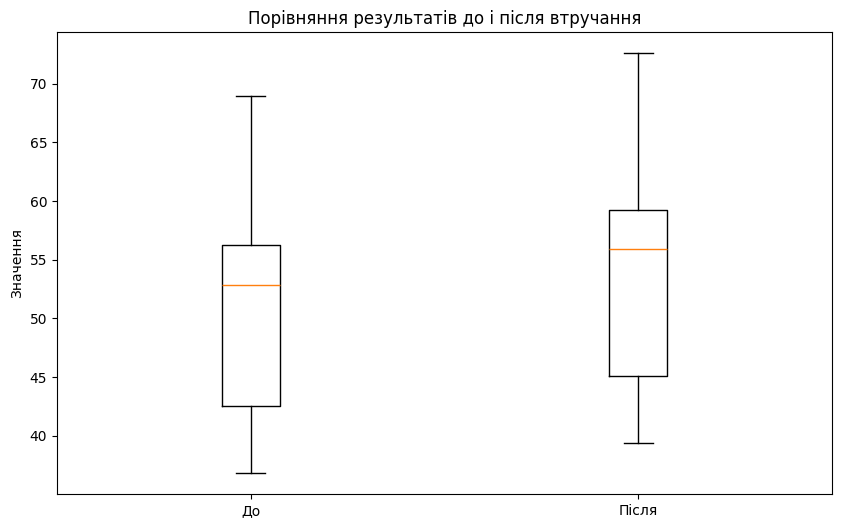

Середнє значення до: 50.89
Середнє значення після: 54.04
Різниця середніх: 3.15


In [61]:
# Проводимо парний t-test
t_statistic, p_value = ttest_pair(before_training, after_training)

# Виводимо результати
print(f"T-статистика: {t_statistic:.4f}")
print(f"P-значення: {p_value:.4f}")

# Інтерпретація результатів
alpha = 0.05  # Рівень значущості
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу. Є статистично значуща різниця.")
else:
    print("Не відхиляємо нульову гіпотезу. Немає статистично значущої різниці.")

# Візуалізація даних
plt.figure(figsize=(10, 6))
plt.boxplot([before_training, after_training], labels=['До', 'Після'])
plt.title('Порівняння результатів до і після втручання')
plt.ylabel('Значення')
plt.show()

# Обчислення та виведення середніх значень
mean_before = np.mean(before_training)
mean_after = np.mean(after_training)
print(f"Середнє значення до: {mean_before:.2f}")
print(f"Середнє значення після: {mean_after:.2f}")
print(f"Різниця середніх: {mean_after - mean_before:.2f}")

**Висновок по тесту:**
Бачимо, що показники працiвникiв полiпшилися пiсля тесту